In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\khich\\OneDrive\\Documents\\IPL2024_DataSet.csv")

## Statistical Analysis and Checking NULL values

In [34]:
# Display the first few rows of the dataframe
print(df.head())

# Display the summary statistics of the dataframe
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

   match_id  season  match_no          date                            venue  \
0    202401    2024         1  Mar 22, 2024  MA Chidambaram Stadium, Chennai   
1    202401    2024         1  Mar 22, 2024  MA Chidambaram Stadium, Chennai   
2    202401    2024         1  Mar 22, 2024  MA Chidambaram Stadium, Chennai   
3    202401    2024         1  Mar 22, 2024  MA Chidambaram Stadium, Chennai   
4    202401    2024         1  Mar 22, 2024  MA Chidambaram Stadium, Chennai   

  batting_team bowling_team  innings  over     striker  ... runs_of_bat  \
0          RCB          CSK        1   0.1       Kohli  ...           0   
1          RCB          CSK        1   0.1       Kohli  ...           1   
2          RCB          CSK        1   0.2  du Plessis  ...           0   
3          RCB          CSK        1   0.3  du Plessis  ...           0   
4          RCB          CSK        1   0.4  du Plessis  ...           0   

   extras  wide  legbyes  byes  noballs  wicket_type player_dismisse

## Total runs scored by each team

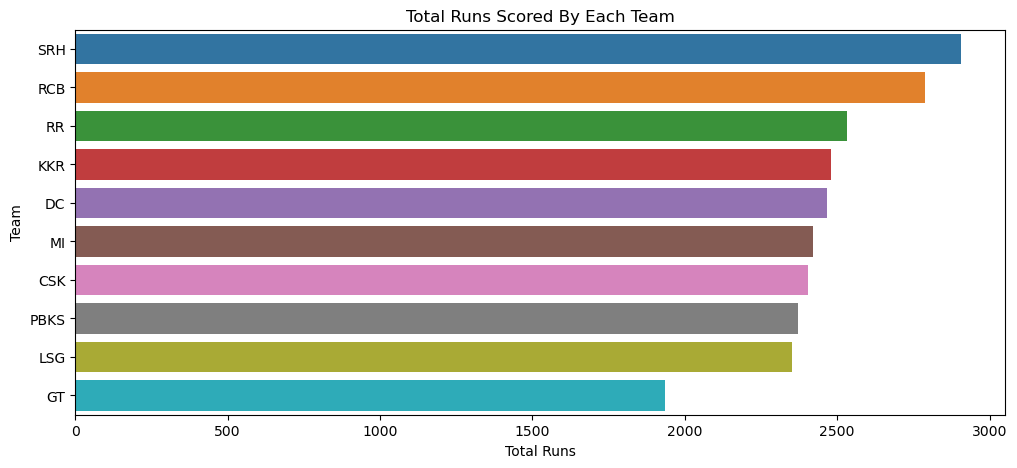

In [48]:
team_runs = df.groupby('batting_team')['runs_of_bat'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(y=team_runs.index, x=team_runs.values)
plt.title('Total Runs Scored By Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.show()

## Total Wickets Taken By Each Team

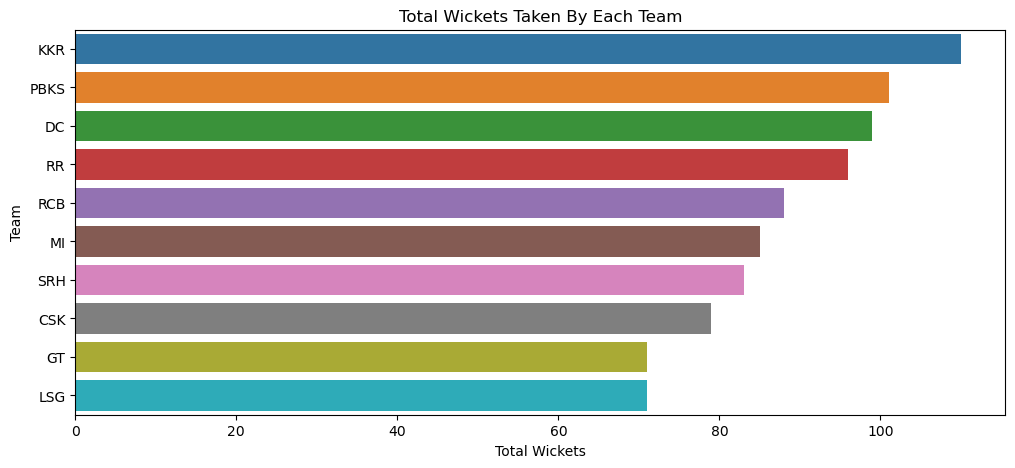

In [47]:
wickets_df = df.dropna(subset=['wicket_type'])
total_wickets = wickets_df.groupby('bowling_team').size().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(y=total_wickets.index, x=total_wickets.values)
plt.title('Total Wickets Taken By Each Team')
plt.xlabel('Total Wickets')
plt.ylabel('Team')
plt.show()

## Top 10 Batsmen In IPL 2024

Top Run Scorer: Kohli
Total Runs: 741


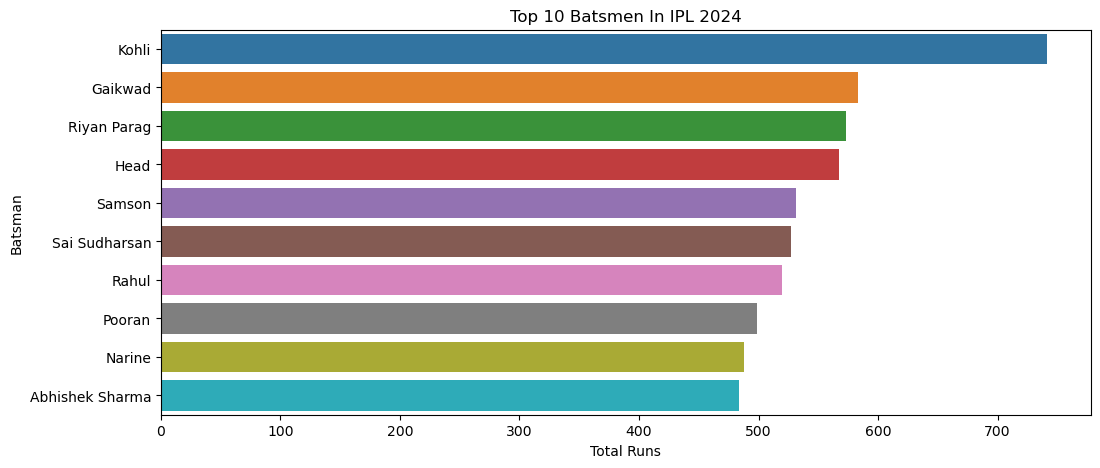

In [46]:
top_run_scorer = batsmen_runs.idxmax()
top_run_scorer_runs = batsmen_runs.max()

print('Top Run Scorer:', top_run_scorer)
print('Total Runs:', top_run_scorer_runs)


batsmen_runs = df.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
sns.barplot(y=batsmen_runs.index, x=batsmen_runs.values)
plt.title('Top 10 Batsmen In IPL 2024')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

## Proportion of Different Types of Dismissals


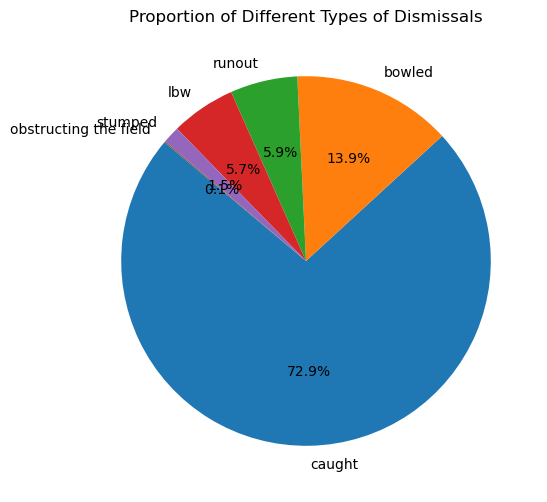

In [30]:
dismissal_types = df[df['wicket_type'] != 'None']['wicket_type'].value_counts()
dismissal_types.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), startangle=140)
plt.title('Proportion of Different Types of Dismissals')
plt.ylabel('')
plt.show()

## Top 10 Scoring Venues

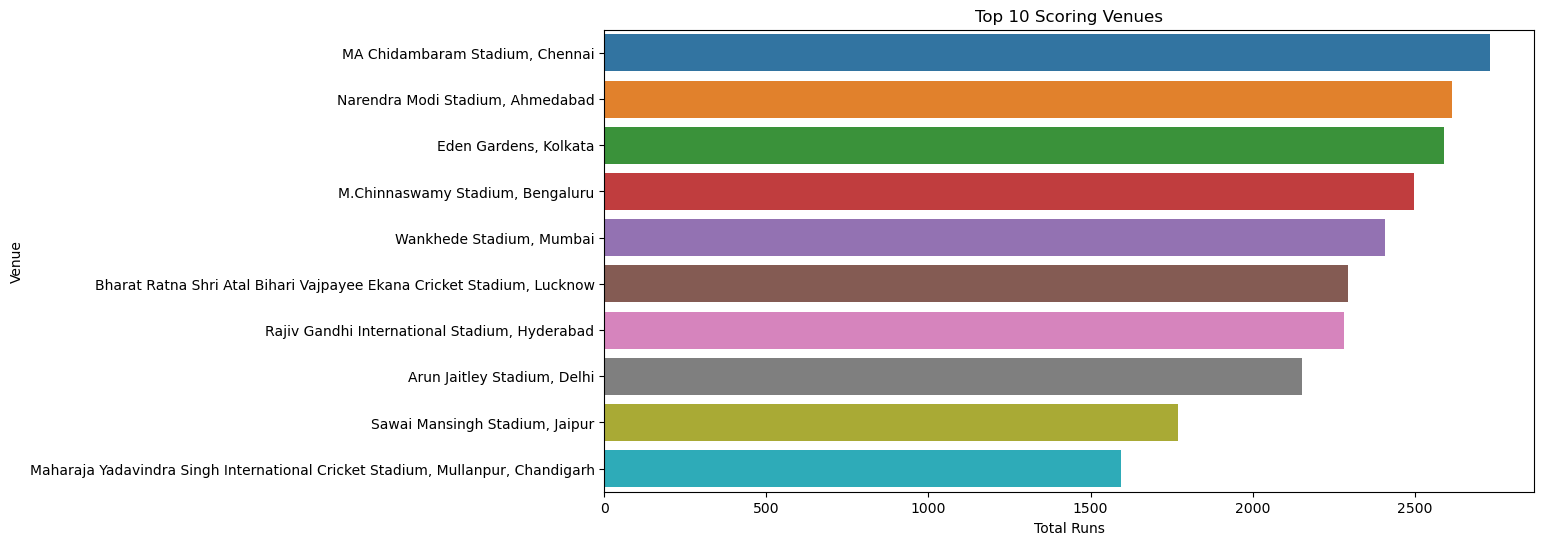

In [11]:
venue_runs = df.groupby('venue')['runs_of_bat'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=venue_runs.index, x=venue_runs.values)
plt.title('Top 10 Scoring Venues')
plt.xlabel('Total Runs')
plt.ylabel('Venue')
plt.show()

## Comparison of Run Rates between Different Overs/Innings


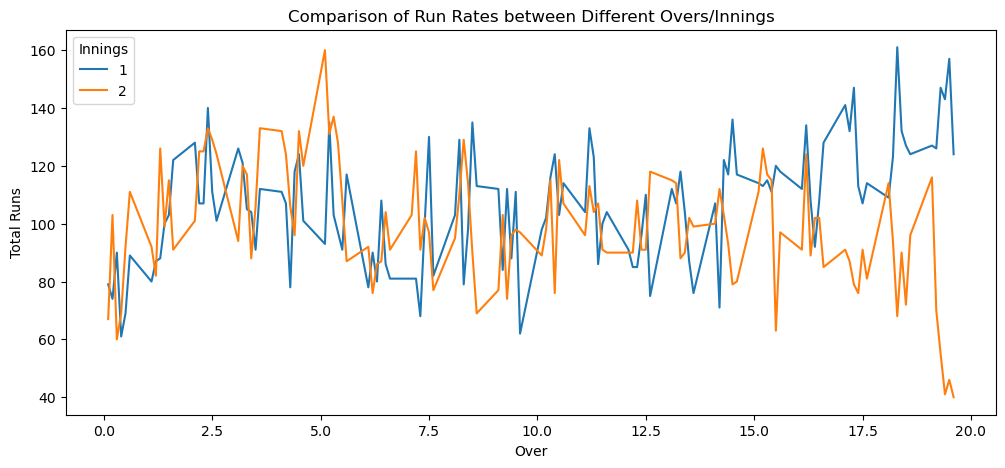

In [45]:
run_rate = df.groupby(['over', 'innings'])['runs_of_bat'].sum().unstack()
run_rate.plot(kind='line', figsize=(12, 5))
plt.title('Comparison of Run Rates between Different Overs/Innings')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.legend(title='Innings')
plt.show()

## Run Rate Comparison Between Different Phases

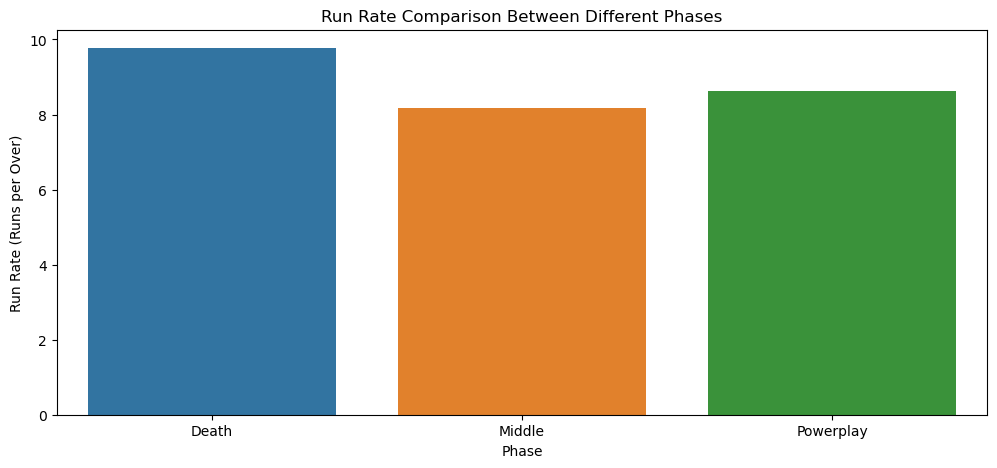

In [44]:
define_phase = lambda over: 'Powerplay' if over <= 6 else ('Middle' if over <= 15 else 'Death')
df['phase'] = df['over'].apply(define_phase)

phase_run_rate = df.groupby('phase')['runs_of_bat'].sum() / df.groupby('phase').size() * 6
plt.figure(figsize=(12, 5))
sns.barplot(x=phase_run_rate.index, y=phase_run_rate.values)
plt.title('Run Rate Comparison Between Different Phases')
plt.xlabel('Phase')
plt.ylabel('Run Rate (Runs per Over)')
plt.show()

## Distribution of Fours and Sixes by Each Team

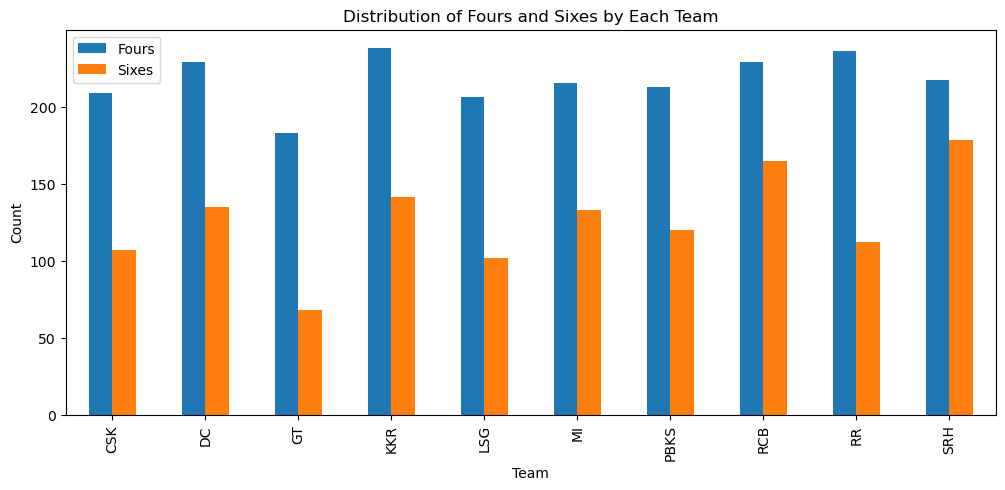

In [43]:
fours = df[df['runs_of_bat'] == 4].groupby('batting_team').size()
sixes = df[df['runs_of_bat'] == 6].groupby('batting_team').size()
boundaries = pd.DataFrame({'Fours': fours, 'Sixes': sixes})
boundaries.plot(kind='bar', figsize=(12, 5))
plt.title('Distribution of Fours and Sixes by Each Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

## Top 10 Bowlers In IPL 2024

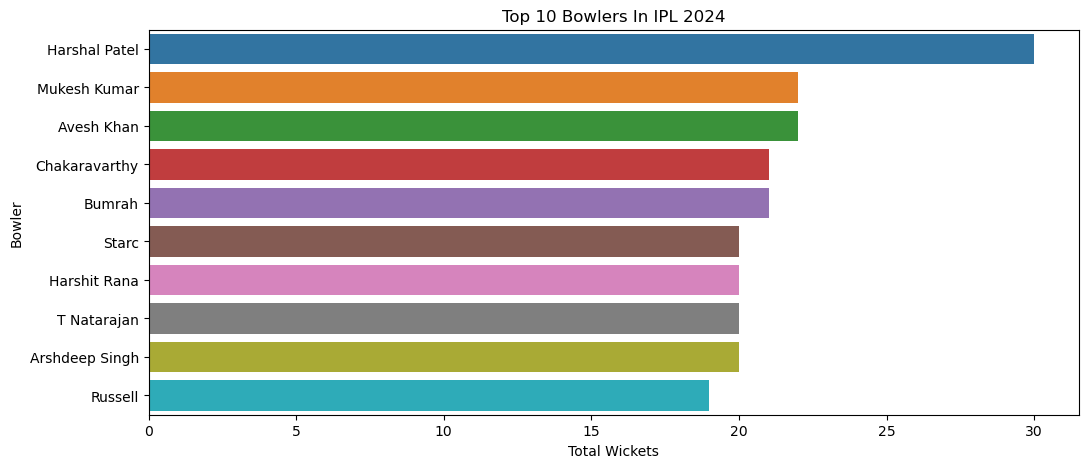

In [42]:
bowlers_wickets = wickets_df.groupby('bowler').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
sns.barplot(y=bowlers_wickets.index, x=bowlers_wickets.values)
plt.title('Top 10 Bowlers In IPL 2024')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

## Top 10 Batsmen by Strike Rate in IPL 2024

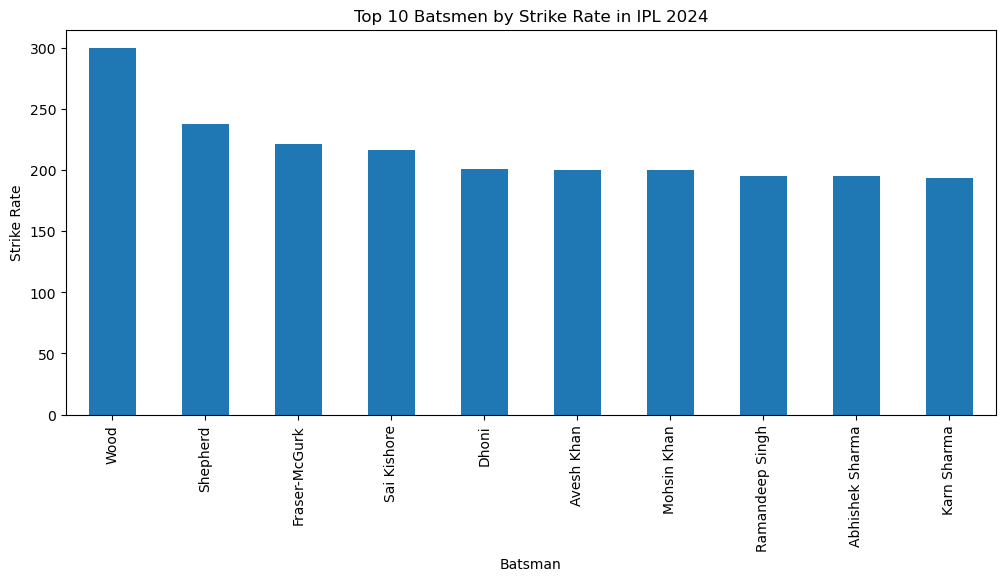

In [41]:
balls_faced = df.groupby('striker').size()
runs_scored = df.groupby('striker')['runs_of_bat'].sum()
strike_rate = (runs_scored / balls_faced) * 100
top_10_batsmen_by_sr = strike_rate.nlargest(10)
top_10_batsmen_by_sr.plot(kind='bar', figsize=(12, 5))
plt.title('Top 10 Batsmen by Strike Rate in IPL 2024')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.show()

## Top players in partnerships

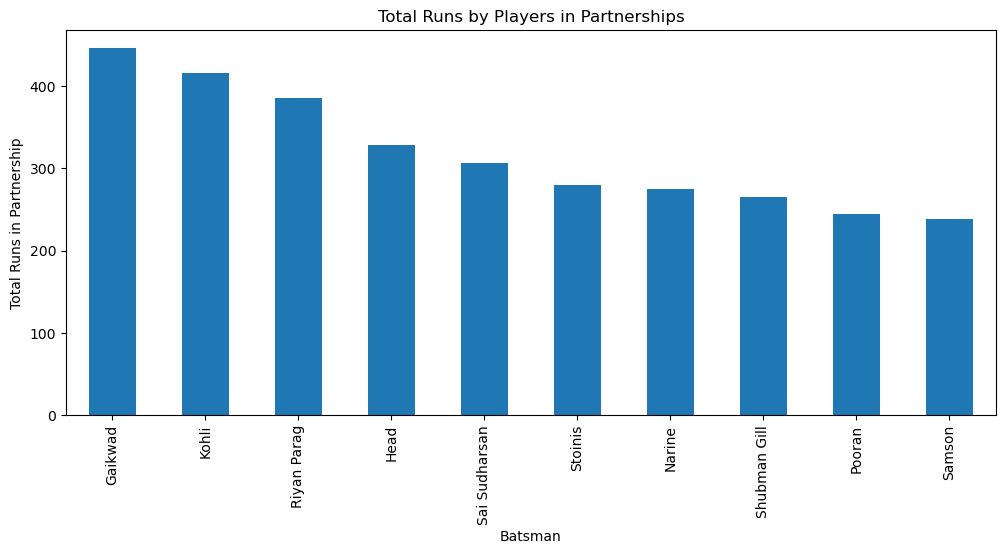

In [40]:
partnerships = df.groupby(['match_id', 'innings', 'striker'])['runs_of_bat'].sum().reset_index()
partnerships = partnerships.groupby(['match_id', 'innings']).apply(lambda x: x.nlargest(1, 'runs_of_bat')).reset_index(drop=True)
partnerships = partnerships.groupby('striker')['runs_of_bat'].sum().nlargest(10)
partnerships.plot(kind='bar', figsize=(12, 5))
plt.title('Total Runs by Players in Partnerships')
plt.xlabel('Batsman')
plt.ylabel('Total Runs in Partnership')
plt.show()